# **Resolução de problema com meta-heurísticas**
### Problema de roteamento de veículos com capacidade de carga (CVRP).
### *Simulated annealing* (recozimento simulado)
Meta-heurística para otimização de problemas que se fundamentada em uma analogia termodinâmica. Annealing (recozimento) e o processo termico utilizado para fundir um metal, no qual este é aquecido e em seguida resfriado lentamente de modo que o material final fique homogêneo (LIMA, 2019). 


### Importação das bibliotecas

In [1]:
import datetime
import math
import matplotlib.pyplot as plt
import numpy as np
import xlrd

from matplotlib.font_manager import FontProperties

### Funções

In [2]:
"""
Função calor
  parâmetros:
    no_dist - distância entre nós
    n - quantidade de veículos
    no_peso - peso para cada nó
    rota_antiga
  return -> Temperatura inicial T0 e rota antiga
"""

def calor(rota_antiga, no_peso, n, no_dist):
  n_dif_aquecimento = np.zeros(1000)  

  for i in range(1000):
    rota_nova = novas_rotas(rota_antiga)
    dist1 = total_dist(rota_antiga, no_peso, n, no_dist)
    dist2 = total_dist(rota_nova, no_peso, n, no_dist)
    n_dif_aquecimento[i] = abs(dist2 - dist1)
    rota_antiga = rota_nova

  t_inicial = 10 * max(n_dif_aquecimento)

  return t_inicial, rota_antiga


"""
Função novas_rotas
  parâmetros:
    rota_antiga - rota base para se obter a nova
  return -> Uma nova rota
"""
def novas_rotas(rota_antiga):
  n = len(rota_antiga)
  a, b = np.random.randint(1, n), np.random.randint(1, n)
  random_esquerda, random_direita = min(a, b), max(a, b)
  reverte = rota_antiga[random_esquerda:random_direita]
  rota_nova = rota_antiga[:random_esquerda] + reverte[::-1] + rota_antiga[random_direita:]

  return rota_nova


"""
Função total_dist
  parâmetros:
    no_dist - distância entre os nós
    n - quantidade de veículos
    rota - caminho a ser calculado
    no_peso - peso para cada nó
  return -> Função objetivo
"""
def total_dist(rota, no_peso, n, no_dist):
  dist = 0

  for i in range(len(rota) - 1):
      dist += no_dist[rota[i]][rota[i + 1]]

  index = [i for i in range(len(rota)) if rota[i] == 0]
  c = [0] * n
  m = [0] * n

  for i in range(len(index) - 1): 
      for j in range(index[i], index[i + 1], 1):
          c[i] += no_peso[rota[j]]  
      if c[i] >= 400:
          m[i] = 20 * (c[i] - 400)  
  soma_m = sum(m)

  return dist + soma_m


"""
Função inicializacao
  parâmetros:
    n_clientes - quantidade de clientes a serem atendidos
    m_veiculos - quantidade de veículos disponíveis
    rota - caminho a ser calculado
    no_peso - peso para cada nó
  return -> Rota inicial, coordenadas x e y do nó, peso do nó
"""
def inicializacao(n_clientes, m_veiculos):

  def obter_dados():
    dados = xlrd.open_workbook('dados.xlsx')
    tabela = dados.sheet_by_index(0)
    return tabela.col_values(0), tabela.col_values(1), tabela.col_values(2)

  rota_inicial = [0] * (n_clientes + m_veiculos + 1)
  no_x, no_y, no_peso = obter_dados()

  for i in range(m_veiculos):
      rota_inicial[i] = 0
  for j in range(n_clientes):
      rota_inicial[j + m_veiculos] = j + 1

  return rota_inicial, no_x, no_y, no_peso, m_veiculos


"""
(PEREIRA; VASCONCELOS, 2012)
Função metropolis
  parâmetros:
    rota_antiga
    nova_rota
    no_peso - peso para cada nó
    m_veiculos - quantidade de veículos disponíveis
  return -> Rota inicial, coordenadas x e y do nó, peso do nó
"""
def metropolis(rota_antiga, nova_rota, no_peso, m_veiculos, temp_recozimento, no_dist):
  dist1 = total_dist(rota_antiga, no_peso, m_veiculos, no_dist) 
  dist2 = total_dist(nova_rota, no_peso, m_veiculos, no_dist) 

  dif = dist2 - dist1

  if dif < 0 or np.exp(-abs(dif) / temp_recozimento) > np.random.random():
      rota = nova_rota
      rota_dist = dist2
  else:
      rota = rota_antiga
      rota_dist = dist1

  return rota, rota_dist


"""
Função mostrar_graficamente
  parâmetros:
    no_x
    no_y
    rota_melhor - rota a ser apresentada
  return -> ''
"""
def mostrar_graficamente(no_x, no_y, rota_melhor):
  def background():
    font = FontProperties(size=15)
    plt.figure(figsize=(10, 10))  
    plt.xlim((0, 100)) 
    plt.ylim((0, 100)) 
    plt.xticks(np.linspace(0, 100, 9)) 
    plt.yticks(np.linspace(0, 100, 9))
    plt.xlabel('x', fontproperties=font)
    plt.ylabel('y', fontproperties=font)
    plt.xlabel('x', fontproperties=font)
    plt.ylabel('y', fontproperties=font)

  def cores():
    arranjo_cor = ['1', '2', '3', '4', '5', '6', '7', '8', '9', 'A', 'B', 'C', 'D', 'E', 'F']
    cor = ""
    for i in range(6):
        cor += arranjo_cor[np.random.randint(0, 14)]
    return "#" + cor

  x_list = []
  y_list = []
  background()

  plt.scatter(no_x, no_y, c='r', s=50, alpha=1)
  indexes = [i for i in range(len(rota_melhor)) if rota_melhor[i] == 0]

  for i in range(len(indexes) - 1):
    for j in range(indexes[i], indexes[i + 1] + 1, 1):
      x_list.append(no_x[rota_melhor[j]])
      y_list.append(no_y[rota_melhor[j]])
    plt.plot(x_list, y_list, c=cores())
    x_list = []
    y_list = []

  plt.savefig('grafico_cvrp_sa.png')
  plt.show()


def cvrp_por_recozimento_simulado(n_clientes, m_veiculos):
  rota_inicial, no_x, no_y, no_peso, m_veiculos = inicializacao(n_clientes, m_veiculos)
  no_dist = [[0] * len(no_x) for i in range(len(no_x))]

  for i in range(len(no_x)):
      for j in range(len(no_x)):
          no_dist[i][j] = np.sqrt((no_x[i] - no_x[j]) ** 2 + (no_y[i] - no_y[j]) ** 2)

  t_inicial, rota_antiga = calor(rota_inicial, no_peso, m_veiculos, no_dist)

  t_taxa_queda = 0.99
  t_final = 0.01
  k = 1000

  ciclos = math.ceil(math.log(t_final / t_inicial, t_taxa_queda))
  solucao_otima_por_ciclo = np.zeros(ciclos + 1)
  rota_melhor = rota_inicial
  dist_menor = np.inf
  n = 0
  t = t_inicial

  while t > t_final:  
      for i in range(k):
        rota_nova = novas_rotas(rota_antiga)
        rota_antiga, dist_rota = metropolis(rota_antiga, rota_nova, no_peso, m_veiculos, t, no_dist)
        if dist_rota <= dist_menor:
          dist_menor = dist_rota
          rota_melhor = rota_antiga

      solucao_otima_por_ciclo[n] = dist_menor  
      n = n + 1
      t = t * t_taxa_queda
      print(f"Melhor distância: {dist_menor}")
      print(t)

  print("CVRP - Recozimento Simulado")
  print(f"Melhor rota: {rota_melhor}")
  print(f"Distância: {total_dist(rota_melhor, no_peso, m_veiculos, no_dist)}")
  indexes = [i for i in range(len(rota_melhor)) if rota_melhor[i] == 0]

  for i in range(len(indexes) - 1):
      print(f"O caminho percorrido：{i + 1}")
      print(rota_melhor[indexes[i]:indexes[i + 1] + 1])

  mostrar_graficamente(no_x, no_y, rota_melhor)

  return

Alterando o número de clientes na planilha **dados.xlsx** faz-se necessário alterar o primeiro parâmetro de:

```
cvrp_por_recozimento_simulado(70, 5)
```

Para alterar o número de veículos disponíveis, mude o segundo parâmetro. Cada veículo tem capacidade **200**.

Melhor distância: 4423.072422190033
73432.081882454
Melhor distância: 4265.018971402582
72697.76106362947
Melhor distância: 3464.8941845842282
71970.78345299317
Melhor distância: 3464.8941845842282
71251.07561846323
Melhor distância: 3464.8941845842282
70538.5648622786
Melhor distância: 3464.8941845842282
69833.1792136558
Melhor distância: 3464.8941845842282
69134.84742151925
Melhor distância: 3464.8941845842282
68443.49894730406
Melhor distância: 3464.8941845842282
67759.06395783102
Melhor distância: 3464.8941845842282
67081.47331825271
Melhor distância: 3464.8941845842282
66410.65858507018
Melhor distância: 3464.8941845842282
65746.55199921947
Melhor distância: 3464.8941845842282
65089.08647922728
Melhor distância: 3464.8941845842282
64438.195614435004
Melhor distância: 3464.8941845842282
63793.81365829065
Melhor distância: 3464.8941845842282
63155.87552170774
Melhor distância: 3464.8941845842282
62524.316766490665
Melhor distância: 3464.8941845842282
61899.07359882576
Melhor distânc

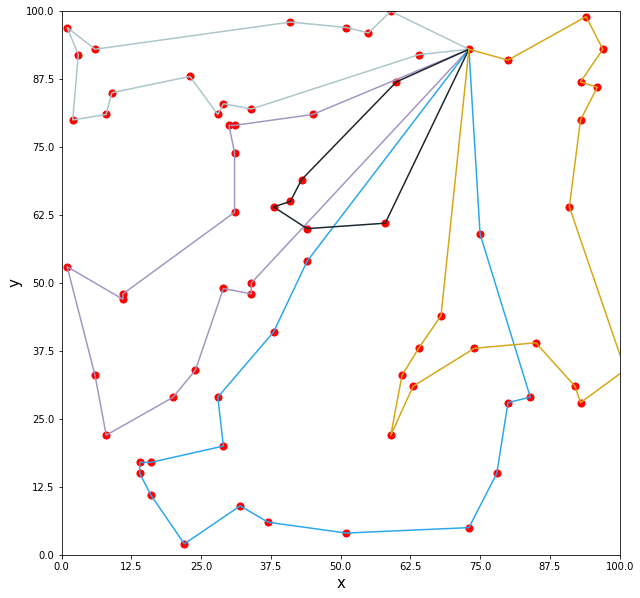

Tempo decorrido: 0:02:15.399454


In [3]:
if __name__ == '__main__':
  tempo_inicio = datetime.datetime.now()
  cvrp_por_recozimento_simulado(70, 5)
  tempo_fim = datetime.datetime.now()
  print(f"Tempo decorrido: {tempo_fim - tempo_inicio}")

## Referências:
LIMA, José Guilherme P.; SILVA, Phillipe I. M.; DOS SANTOS, Walberto M.; CLÍMACO, Glaubos. Simulated Annealing aplicado ao problema do empacotamento unidimensional. In: ESCOLA REGIONAL DE COMPUTAÇÃO DO CEARÁ, MARANHÃO E PIAUÍ (ERCEMAPI), 7. , 2019, São Luís. Anais [...]. Porto Alegre: Sociedade Brasileira de Computação, 2019 . p. 25-31. 

PEREIRA, M. A.; VASCONCELOS, J. A. Recozimento simulado. Manual de computação evolutiva e metaheurística, p. 163–176, 2012.